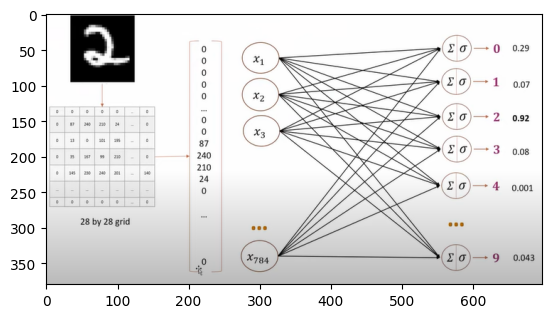

In [27]:
## imageleri temsil etmek için piksellerden yararlanıcaz. 
# 0 - siyah, 255 - beyaz

import cv2
import matplotlib.pyplot as plt

img = cv2.imread("piksel.png")
plt.imshow(img)

# "2" sayısı için:

# 2 dimentional array elde ediyoruz böyle. sonra onu 1 dimentional arraye çeviriyoruz
# 7x7den elimizde 49 tane sayı var. yani input layerimizda 49 tane nöron olmuş olucak (x1... x49)
#output layer da 0-9 sayılarını içerecek yani 10 tane output olucak
#bundan şimdilik hidden layer olmıycak. olsaydı accuracy artardı

In [28]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [29]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [30]:
len(X_train)

60000

In [31]:
len(X_test)

10000

In [32]:
X_train[0].shape # 28x28 

(28, 28)

In [33]:
X_train[0] #böyle bir 28x28 2 dimentional array 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

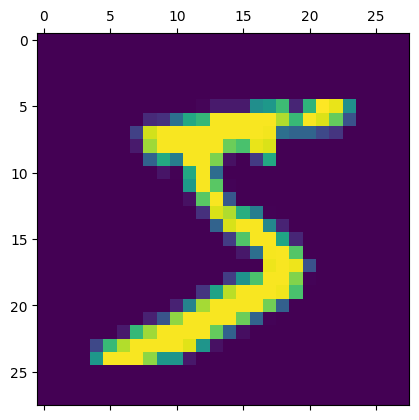

In [34]:
plt.matshow(X_train[0]) #5

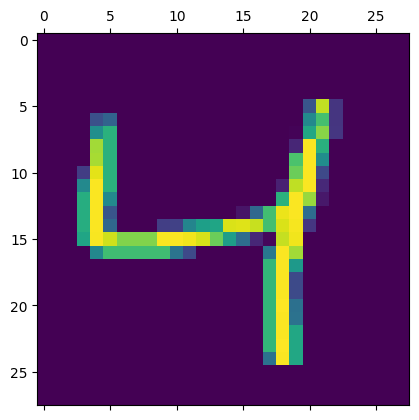

In [35]:
plt.matshow(X_train[2]) #4

In [36]:
y_train[2]

4

In [45]:
X_train = X_train /255
X_test = X_test / 255

In [46]:
#training datasetini flatten yapıcaz yani 1 dimentional array

X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [47]:
X_train_flattened.shape

(60000, 784)

In [48]:
X_test_flattened.shape

(10000, 784)

In [49]:
#neural network:

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation="sigmoid" )
])

#dense input layerdaki her şeyi bir sonraki layerla tek tek bağlamak için
#ordaki 10 output_shape anlamına geliyor yani output layerdaki output sayısı

In [50]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
    )

#compile etmek zorundayız. optimizer efficiency için. loss performans için metricsler

In [51]:
#train etmek için

model.fit(X_train_flattened, y_train, epochs=5)

# epochs, neural networkün kaç kere çalışmasını istediğimiz iterasyon sayısı

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4670 - accuracy: 0.8770
Epoch 2/5
1875/1875 [==============================] - 2s 968us/step - loss: 0.3033 - accuracy: 0.9158
Epoch 3/5
1875/1875 [==============================] - 2s 971us/step - loss: 0.2831 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 2s 921us/step - loss: 0.2727 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 2s 855us/step - loss: 0.2666 - accuracy: 0.9256


In [52]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 845us/step - loss: 0.2682 - accuracy: 0.9259


[0.26818013191223145, 0.9258999824523926]

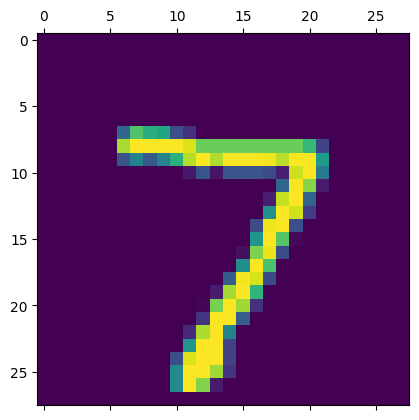

In [53]:
plt.matshow(X_test[0])

In [54]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

#10 tane değer döndü çünkü benzerliklerini hesaplamış oldu

313/313 [==============================] - 0s 731us/step


array([2.0982862e-02, 3.9554911e-07, 7.2864793e-02, 9.6233022e-01,
       2.4653841e-03, 1.3867871e-01, 1.4927880e-06, 9.9972802e-01,
       9.5471956e-02, 5.7461280e-01], dtype=float32)

In [55]:
np.argmax(y_predicted[0]) #bu np fonskiyonu dönenler arasında en yüksek olanı veriyor

#yani doğru bildi

7

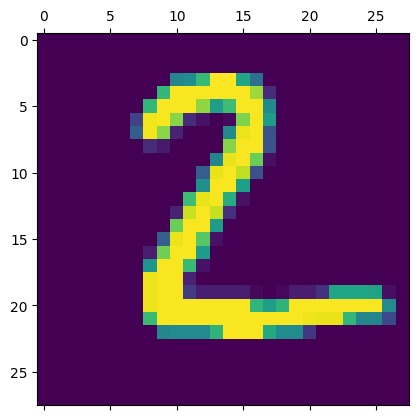

In [56]:
plt.matshow(X_test[1])

In [57]:
y_predicted = model.predict(X_test_flattened)
y_predicted[1]

313/313 [==============================] - 0s 735us/step


array([4.4914603e-01, 8.5674264e-03, 9.9948120e-01, 4.7752416e-01,
       6.4748312e-10, 8.9211202e-01, 9.3820584e-01, 6.8982764e-13,
       1.8194602e-01, 3.1543606e-09], dtype=float32)

In [58]:
np.argmax(y_predicted[1])

2

In [59]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [60]:
#confusion matrix hesaplayabilmek için ylabel ile değerleri aynı şekil dönmeli

y_predicted_labels = [np.argmax(i) for i in  y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [62]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    2,    2,    0,    5,    7,    2,    1,    0],
       [   0, 1115,    3,    2,    0,    1,    4,    2,    8,    0],
       [   5,    8,  926,   17,    8,    5,   13,    8,   38,    4],
       [   2,    0,   20,  922,    0,   26,    2,    9,   22,    7],
       [   1,    1,    6,    1,  916,    0,   11,    3,    9,   34],
       [   7,    3,    2,   37,    9,  783,   16,    4,   27,    4],
       [  11,    3,    7,    1,    7,   10,  915,    2,    2,    0],
       [   1,    7,   26,    7,    9,    1,    0,  940,    3,   34],
       [   7,   11,    5,   21,    9,   29,   10,    9,  865,    8],
       [  11,    7,    1,   11,   31,    7,    0,   17,    8,  916]])>

Text(95.72222222222221, 0.5, 'truth')

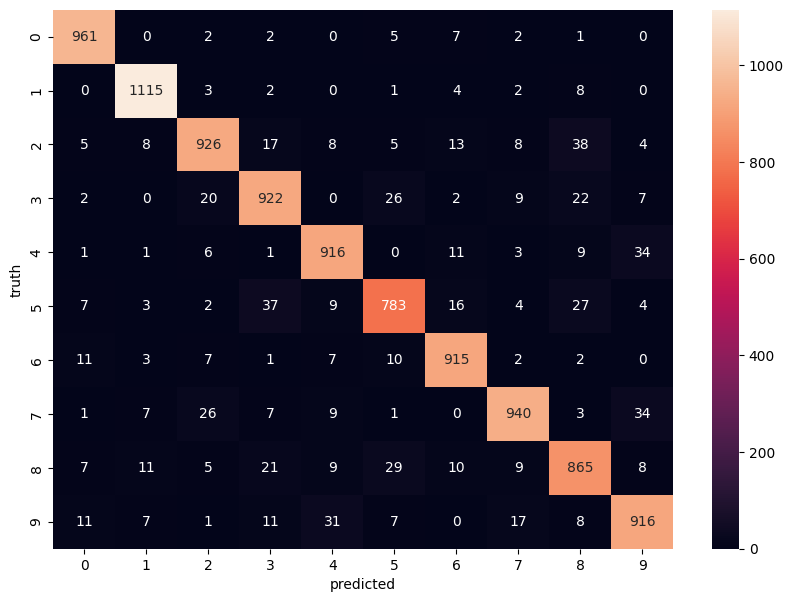

In [64]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True, fmt="d")
plt.xlabel("predicted")
plt.ylabel("truth")

In [65]:
# errorları ortadan kaldırmak için hidden layer ekliycem

model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation="relu" ),
    keras.layers.Dense(10,activation="sigmoid" )
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
    )

model.fit(X_train_flattened, y_train, epochs=5)

#iki layer eklemiş oldum bu keras.layers.dense ile.
#ikinci layerin inputshape'e ihtiyacı yok çünkü first layer neye bağlıysa ona bakarak ne yapması gerektiğini anlıyor
#ilk layerda hidden layerda yer alacak nöron sayısını belirtmem gerekiyor (deneme yanılma ile bir sayı ver = 100 verdim)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2686 - accuracy: 0.9234
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1231 - accuracy: 0.9640
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0864 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0654 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0516 - accuracy: 0.9843


In [66]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0854 - accuracy: 0.9746


[0.08544240146875381, 0.9746000170707703]

313/313 [==============================] - 0s 1ms/step


Text(95.72222222222221, 0.5, 'truth')

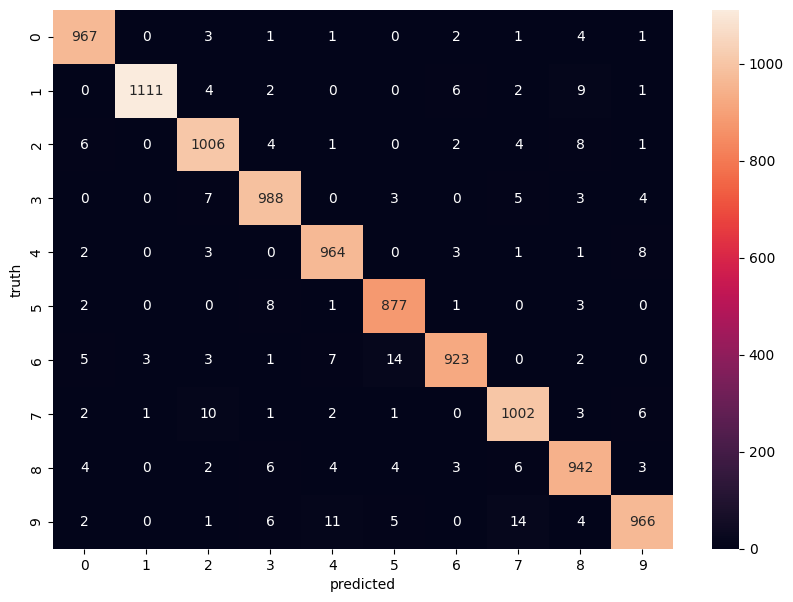

In [67]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in  y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True, fmt="d")
plt.xlabel("predicted")
plt.ylabel("truth")

In [68]:
#ayrı bir şekilde flatten yapmadan direkt bunu da kullanabiliriz

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation="relu" ),
    keras.layers.Dense(10,activation="sigmoid" )
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
    )

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2735 - accuracy: 0.9213
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1255 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0892 - accuracy: 0.9731
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0662 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0532 - accuracy: 0.9836
